In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ! python -m site

In [4]:
# ! pip install fuzzymatcher
# https://github.com/RobinL/fuzzymatcher/issues/42

# from fuzzymatcher import link_table, fuzzy_left_join
# import fuzzymatcher

# fuzzymatcher.link_table(df_left, df_right, left_on, right_on)

## Spotify Data, Pitchfork Reviews

First, we are going to upload to the acoustic_features.csv, albums.csv, and reviews.csv file.

In [5]:
acoustics = pd.read_csv("acoustic_features.csv")
billboard = pd.read_csv("albums.csv")
pitchfork = pd.read_csv("reviews.csv")
# billboard_pitchfork = pd.read_pickle("./grouped_billboard.pkl")

In [6]:
pitchfork.head()

,index,id,artist,album,genre,score,date,author,role,review,bnm,link
0,0,0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,January 11 2019,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...
1,1,1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,January 11 2019,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...
2,2,2,Jorge Velez,Roman Birds,Electronic,7.9,January 10 2019,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...
3,3,3,Chandra,Transportation EPs,Rock,7.8,January 10 2019,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...
4,4,4,The Chainsmokers,Sick Boy,Electronic,3.1,January 9 2019,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...


## Size of each data set:

In [7]:
print("The size of the acoustics dataset is:","{:,}".format(acoustics.shape[0]), "rows.")
print("The size of the billboard dataset is:","{:,}".format(billboard.shape[0]), "rows.")
print("The size of the pitchfork dataset is:","{:,}".format(pitchfork.shape[0]), "rows.")

The size of the acoustics dataset is: 339,855 rows.
The size of the billboard dataset is: 573,947 rows.
The size of the pitchfork dataset is: 20,873 rows.


## Data Cleaning: String Lowercasing Artist and Album in Pitchfork and Billboard

In [9]:
"""
"ó", "é", "+", ",", "ö", ""
"rancid/nofx" vs. "rancidand nofx"
.replace("_"," ")
remove "*"
remove "-"
"ç","c"
""
" da", ""
"-", " "
"melvins", "the melvins"
"""

p_artist = pitchfork["artist"].str.lower()
p_artist = p_artist.str.replace("&"," and")
p_artist = p_artist.str.replace("$", "s")
p_artist = p_artist.str.replace(".","")
p_artist = p_artist.str.replace("ó","o")
p_artist = p_artist.str.replace("ö","o")
p_artist = p_artist.str.replace(","," and")
p_artist = p_artist.str.replace("é","e")
p_artist = p_artist.str.replace("é","e")
p_artist = p_artist.str.replace("+","and")
p_artist = p_artist.str.replace("ç","c")
p_artist = p_artist.str.replace("*","")
p_artist = p_artist.str.replace("-"," ")
p_artist = p_artist.str.replace(" da", "")
p_artist = p_artist.str.replace("/", " and ")
p_artist = p_artist.str.replace("melvins", "the melvins")
p_artist = p_artist.str.replace("futureand", "future and")
p_album = pitchfork["album"].str.lower()
pitchfork["artist"] = p_artist
pitchfork["album"] = p_album

b_artist = billboard["artist"].str.lower()
b_artist = b_artist.str.replace("&"," and")
b_artist = b_artist.str.replace("$", "s")
b_artist = b_artist.str.replace(".","")
b_artist = b_artist.str.replace("ó","o")
b_artist = b_artist.str.replace("ö","o")
b_artist = b_artist.str.replace(","," and")
b_artist = b_artist.str.replace("é","e")
b_artist = b_artist.str.replace("é","e")
b_artist = b_artist.str.replace("+","and")
b_artist = b_artist.str.replace("ç","c")
b_artist = b_artist.str.replace("*","")
b_artist = b_artist.str.replace("-"," ")
b_artist = b_artist.str.replace(" da", "")
b_artist = b_artist.str.replace("/", " and ")
b_artist = b_artist.str.replace("melvins", "the melvins")
b_artist = b_artist.str.replace("futureand", "future and")


b_album = billboard["album"].str.lower()
billboard["artist"] = b_artist
billboard["album"] = b_album
billboard = billboard.iloc[1:]

## Fuzzy Matching

In [10]:
billboard.query("album=='Flower Boy'");

In [11]:
bad_artists = ['Japandroids', 'Sammy Kershaw', 'Keef Hartley Band', 'Vanilla Fudge']

grouped_billboard = billboard.loc[billboard.groupby(["album"])["rank"].idxmin()]
grouped_billboard = grouped_billboard.sort_values(by="date",ascending=False)
grouped_billboard = grouped_billboard[grouped_billboard['artist'] != "japandroids"]
grouped_billboard = grouped_billboard[grouped_billboard['artist'] != "sammy kershaw"]
grouped_billboard = grouped_billboard[grouped_billboard['artist'] != "keef hartley band"]
print(grouped_billboard.query("artist == 'Vanilla Fudge'"))
grouped_billboard = grouped_billboard[grouped_billboard['artist'] != "vanilla fudge"]

Empty DataFrame
Columns: [index, id, date, artist, album, rank, length, track_length]
Index: []


In [12]:
len(grouped_billboard.head())

5

In [13]:
#Fuzzymatcher

left_on = ['artist', 'album'] # BB
right_on = ['artist', 'album'] # PF

#df = fuzzymatcher.link_table(grouped_billboard, pitchfork.iloc[:-1], left_on, right_on, left_id_col = "index", right_id_col = "index")

## The Final Version Gets Saved To A Pickle

In [14]:
# df.to_pickle('./fuzzymatched.pkl')
#original_df.to_pickle("./dummy.pkl")

```python
df = pd.read_pickle('fuzzymatched.pkl')
```

## Fuzzy match complete: joining good_rows to grouped_billboard

```python
good_rows = df[df["match_score"] > 0.6]
good_rows = good_rows[good_rows["match_rank"] == 1]
good_rows = good_rows.rename(index=str, columns={"__id_right": "pitchfork_id", "__id_left": "billboard_id"})
good_rows.head()
```

Processing the fuzzybillboard dataset.

In [15]:
fuzzybillboard = grouped_billboard.merge(good_rows, left_on='index', right_on='billboard_id', how = "left") #.sort_values(by='date', ascending = False)
fuzzybillboard

NameError: name 'good_rows' is not defined

In [ ]:
billfuzzypitch = fuzzybillboard.merge(pitchfork, left_on = "pitchfork_id", right_on="index", how="left")
#pitch = billfuzzypitch["review"].isnull()
#pitch
billfuzzypitch = billfuzzypitch.sort_values(by=['date_x', 'rank'], ascending = [False, True])

In [ ]:
billfuzzypitch["hasreview"] = billfuzzypitch['review'].notnull()
billfuzzypitch.query("hasreview == True")

## Now dropping unnecessary columns from the billfuzzypitch dataset 

In [ ]:
## TO DO LIST:
# Drop the id_x colum
#rename the index_x album billboard_id and delete the billboard_id colum


In [ ]:
billfuzzypitch.head()

In [ ]:
billfuzzypitch = billfuzzypitch.drop(columns = ['id_x','billboard_id','match_score','match_rank','artist_left','artist_right','artist_y','album_left', 'album_right','album_y', 'index_y','id_y'])
billfuzzypitch = billfuzzypitch.rename(index = str, columns = {"index_x":"billboard index","date_x":"billboard date","artist_x":"artist","album_x":"album","pitchfork_id": "pitchfork index", "track_length": "track length", "date_y": "date of review", "rank": "billboard rank", "score": "pitchfork score"})

In [ ]:
billfuzzypitch.head()

In [ ]:
df.to_pickle('./grouped_billboardandpitchfork1.pkl')

## Finished

In [ ]:
billfuzzypitch.head()

In [ ]:
billfuzzypitch.to_pickle('./BILLFUZZYPITCHFINISHED.pkl')

In [ ]:
billfuzzypitch = pd.read_pickle('./BILLFUZZYPITCHFINISHED.pkl')

In [ ]:
billfuzzypitch.query("artist == 'arcade fire'")

## Exploratory Data Analysis

## What genre of albums are most frequently reviewed?

In [ ]:
genres = billfuzzypitch[billfuzzypitch['hasreview'] == True]
genres

a = billfuzzypitch.groupby(['genre'])['genre'].count().sort_values(ascending=False)
a = a[0:10]

b = pitchfork.groupby(['genre'])['genre'].count().sort_values(ascending=False)
b = b[0:10]

In [ ]:
#Let's look at the genre
plt.figure(figsize = [12,12])
plt.subplot(1,2,1)
plt.title("The 10 Most Common Genres Pitchfork Reviews From The Billboard 200") #title for subplots
#plt.xlabel("Genre") #title for x axis
plt.ylabel("Reviews per Genre") #title for y axis
sns.barplot(x = a.index, y = a.values)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.subplots_adjust(right = 1.0, top = 0.4)
plt.title("The 10 Most Common Genres of Albums Pitchfork Reviews") #title for subplots
#plt.xlabel("Genre") #title for x axis
plt.ylabel("Reviews per Genre") #title for y axis
sns.barplot(x = b.index, y = b.values)
plt.xticks(rotation='vertical')

In [ ]:
plt.figure()
plt.title("The 20 Most Common Genres of Albums Pitchfork Reviews Regardless of Billboard Ranking") #title for subplots
#plt.xlabel("Genre") #title for x axis
plt.ylabel("Reviews per Genre") #title for y axis
sns.barplot(x = b.index, y = b.values)
plt.xticks(rotation='vertical')

Pitchfork likes Rock music. They also don't classify any of the albums they review as Indie, which is funny since Pitchfork clearly loves Indie music.

## Which genres does Pitchfork like?

In [ ]:
billfuzzypitch

In [19]:
genres = billfuzzypitch[billfuzzypitch['hasreview'] == True]
genres

c = genres.groupby(['genre'])['pitchfork score'].mean().sort_values(ascending=False)

d = pitchfork.groupby(['genre'])['score'].mean().sort_values(ascending=False)

NameError: name 'billfuzzypitch' is not defined

In [ ]:
c

In [ ]:
d

In [ ]:
good_rows.shape

In [ ]:
blahblah = genres[genres['pitchfork score'] >= 6]

In [ ]:
print(len(blahblah)/(len(good_rows)))

Only 10% of all of the albums Pitchfork has ever reviewed actually got a score of 8.4 or above. On a grading scale, an 8.4 is an A. With that same logic in mind, what's an F? 57.8% of all albums reviewed received a 7.4 or less.

In [ ]:
blahblahblah = pitchfork[pitchfork['score'] >= 8.4]

In [ ]:
print(len(blahblahblah)/(len(pitchfork)))

In [ ]:
blahblahblah = pitchfork[pitchfork['score'] <= 7.4]

In [ ]:
print(len(blahblahblah)/(len(pitchfork)))

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

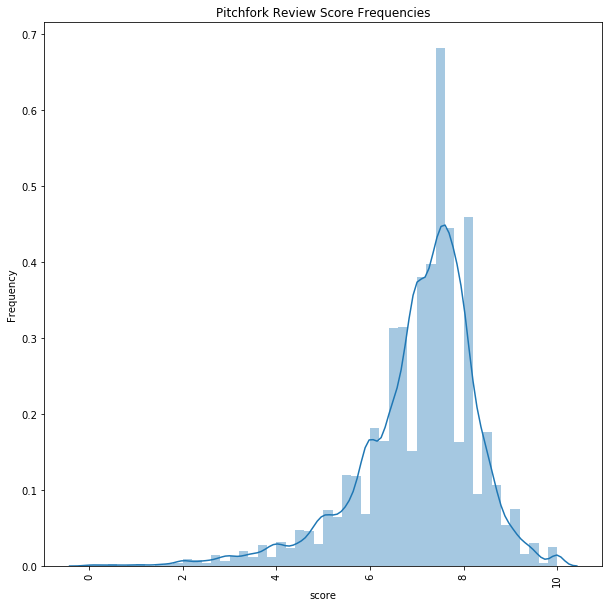

In [16]:
plt.figure(figsize = [10,10])
plt.title("Pitchfork Review Score Frequencies") #title for subplots
#plt.xlabel("Genre") #title for x axis
plt.ylabel("Frequency") #title for y axis
sns.distplot(pitchfork['score'])
plt.xticks(rotation='vertical')

In [17]:
print(pitchfork['score'].mean())
print(pitchfork['score'].median())

7.039357064149859
7.3


NameError: name 'genres' is not defined

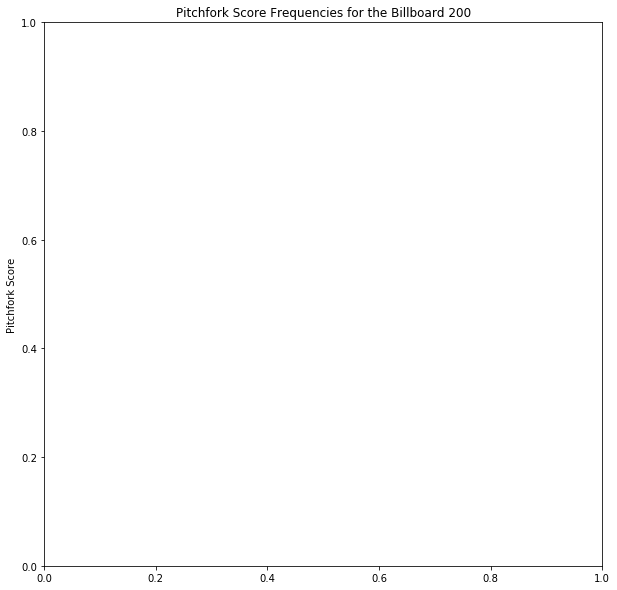

In [18]:
plt.figure(figsize = [10,10])
plt.title("Pitchfork Score Frequencies for the Billboard 200") #title for subplots
#plt.xlabel("Genre") #title for x axis
plt.ylabel("Frequency") #title for y axis
plt.ylabel("Pitchfork Score")
sns.distplot(genres['pitchfork score'])
plt.xticks(rotation='vertical')

In [ ]:
genres['pitchfork score'].median()

## Correlation Matrix for Pitchfork Scores and Billboard Rankings

**Correlation Matrix: ALL OF OUR PREDICTORS ARE BELONG TO US**

In [ ]:
df1 = billfuzzypitch.filter(['billboard rank', 'length', 'track length', 'pitchfork score', 'bnm'], axis = 1)
df1.head(3)

In [ ]:
sns.heatmap(df1.corr(),
                                vmin=-1, vmax=1, center=0,
                                cmap=sns.diverging_palette(20, 220, n=200),
                                square=True)
#mov_data = ['billboard index', 'billboard date', 'artist', 'album', 'billboard rank', 'length', 'track length', 'pitchfork index', 'genre', 'pitchfork score', 'date of review', 'author', 'author', 'role', 'review', 'bnm', 'link', 'hasreview']
#ax.set_xticklabels(mov_data)
#ax.set_yticklabels(mov_data)
plt.show()

In [ ]:
corr_df = df1.corr()
corr_df

In [ ]:
df1 = billfuzzypitch.filter(['billboard index', 'billboard rank', 'length', 'track length', 'pitchfork index', 'pitchfork score', 'bnm'], axis = 1)
df1.head(3)

In [ ]:
sns.pairplot(df1)

There's a slight negative correlation between Pitchfork labeling an albumn "Best New Music" and a slight positive correlation between a high Pitchfork score and a low Billboard ranking. This is interesting, and could simply be due to the random sampling nature of the data. It could also be that Pitchfork prefers albums that aren't generally popular to the public. The "Best New Music"'s negative correlation seems to imply that getting stamped "Best New Music" correlates with a slight uptick in billboard ranking.

## Measuring the Polarity of the Billboard 200

Getting the polarity scores of different words.

In [ ]:
sent = pd.read_csv("vader_lexicon.txt",
                   header = None, 
                   names = ["token", "polarity", "standard deviation", "raw-human-sentiment-rating"],
                   sep = "\t",
                   usecols = [0,1],
                   index_col = "token")
sent.head(5)

In [ ]:
billfuzzypitch['review'] = billfuzzypitch['review'].str.lower()
punct_re = r'[^\w\s]'
billfuzzypitch['no punc'] = billfuzzypitch['review'].str.replace(punct_re, " ")
tidy_format = billfuzzypitch['no punc'].str.split(expand= True).stack().reset_index(level=1).rename(columns={"level_1": "num", 0: "word"})

In [ ]:
billfuzzypitch['polarity'] = (
    tidy_format
    .merge(sent, how='left', left_on='word', right_index=True)
    .reset_index()
    .loc[:, ['index','polarity']]
    .groupby('index')
    .sum()
    .fillna(0)
)

#billfuzzypitch.query("hasreview == True")

## Now to see if there's a correlation between review polarity and either Billboard Ranking or 

In [ ]:
df2 = billfuzzypitch.filter(['billboard rank', 'length', 'track length', 'pitchfork score', 'bnm', 'polarity'], axis = 1)

In [ ]:
df2.corr()

In [ ]:
sns.heatmap(df2.corr(),
                                vmin=-1, vmax=1, center=0,
                                cmap=sns.diverging_palette(20, 220, n=200),
                                square=True)
#mov_data = ['billboard index', 'billboard date', 'artist', 'album', 'billboard rank', 'length', 'track length', 'pitchfork index', 'genre', 'pitchfork score', 'date of review', 'author', 'author', 'role', 'review', 'bnm', 'link', 'hasreview']
#ax.set_xticklabels(mov_data)
#ax.set_yticklabels(mov_data)
plt.show()

In [ ]:
sns.pairplot(df2)
;

## Multiple Linear Regression: Regressing Billboard Rank on Numerical Features

Does Pitchfork Polarity and album ranking bear any weight on Billboard 200?

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm



In [ ]:
model_data[model_data["bnm"] != None]

In [ ]:
model_data = billfuzzypitch.query("hasreview == True")   
model_data = model_data.dropna()
model_data['intercept'] = 1

billboard_rank = model_data['billboard rank']

billboard_features = model_data.filter(['intercept','track length','length', 'pitchfork score', 'bnm', 'polarity'], axis = 1)

In [ ]:
model_rankonfeatures = sm.OLS(billboard_rank, billboard_features).fit()
model_rankonfeatures.summary()



In [ ]:
model_rankonfeatures.conf_int()

y_hat = model_rankonfeatures.fittedvalues
y = billboard_rank

residuals = y - y_hat
min(y_hat)

In [ ]:
plt.figure(figsize = [10,10])
plt.title("Residuals Plot") #title for subplots
plt.xlabel("Fitted Values") #title for x axis
plt.ylabel("Residuals") #title for y axis
sns.scatterplot(y_hat, residuals)
plt.xticks(rotation='vertical')

## Multiple Linear Regression: Regressing Pitchfork Score on BNM and Review Polarity

The takeaway here is that Pitchfork's review polarity, BNM labeling, and album score have no statistically significant power in explaining or predicting an albums Billboard 200 ranking.

In [ ]:
model_data = billfuzzypitch.query("hasreview == True")   
model_data = model_data.dropna()
model_data['intercept'] = 1

pitchfork_score = model_data['pitchfork score'].values

pitchfork_features = np.asarray(model_data.filter(['intercept','bnm', 'polarity'], axis = 1).values.tolist())


In [ ]:
#model_pitchscoreonfeatures = sm.OLS(pitchfork_score, pitchfork_features).fit()
model_pitchscoreonfeatures = sm.OLS(model_data['pitchfork score'], model_data.filter(['intercept','bnm', 'polarity'], axis = 1)).fit()


model_pitchscoreonfeatures.summary()

Interesting find! Based on these results, if an album is labeled "Best New Music", in general, Pitchfork's album score will increase by approximately 2 points. Also, since the Polarity of an album is not statistical significant, it shows that an album's polarity does not predict it's album score. This could either be based on a flaw in my method of ascertaining the polarity of an album. However, this could also be because the review itself is its own work of art, with the author of the review expressing her response to the album, rather than evaluating the music based off rigid criteria. It also lends to the idea that Pitchfork as a reviewing entity behaves more like an individual with specific preferences, rather than an agency meant to provide objective ratings.

Pitchfork's opinion of an album also has very little weight when it comes to predicting an albums success. Many succesful albums on the Billboard 200 were never reviewed by Pitchfork, and for the albums that Pitchfork did review, their score of an album bore no weight on its overall Billboard 200 success.

In [ ]:
y_hat = model_pitchscoreonfeatures.fittedvalues
y = pitchfork_score

residuals = y - y_hat

In [ ]:
plt.figure(figsize = [10,10])
plt.title("Residuals Plot") #title for subplots
plt.xlabel("Fitted Values") #title for x axis
plt.ylabel("Residuals") #title for y axis
sns.scatterplot(y_hat, residuals)
plt.xticks(rotation='vertical')